In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import glob
import skimage.io as io

import numpy as np
from skimage import filters
from skimage.filters import threshold_multiotsu
import cv2
from skimage.morphology import disk

In [ ]:
#A code to change the names of images file in folder, 8 rep, according to filming order
from google.colab import drive
import os

directory = "/content/drive/MyDrive/or_wheat/try_names/"

# Get a list of all the files in the directory
files = os.listdir(directory)

# Sort the files by their creation time according to the names the camera automaticly gives, assending order
files.sort()
# Initialize a counter for technical rep
counter = 1

# Initialize a variable to keep track of biologic rep
current_set = 1

# Loop through the sorted files
for file in files:
    # Get the file extension
    extension = os.path.splitext(file)[1]
    # Rename the file with the new name
    os.rename(directory + file, directory + str(current_set) + "_" + str(counter) + extension)
    counter += 1

    if counter > 8:
        counter = 1
        current_set += 1


In [ ]:
img = io.imread("/content/drive/MyDrive/seed.jpeg", as_gray = True)
ret, thresh = cv2.threshold(image_list[5], 0.70, 1, cv2.THRESH_BINARY)
# left = thresh[700:900,500:585]
# right = thresh[700:900,585:700]
left = thresh
#left = thresh[460:,200:770]
#right = thresh[460:,200:770]
plt.imshow(left, cmap = "gray")

NameError: ignored

Found automatic threshold t= 0.49296323988970586  (125.705626171875)



Text(0.5, 1.0, 'Our mask, using skimage+otsu')

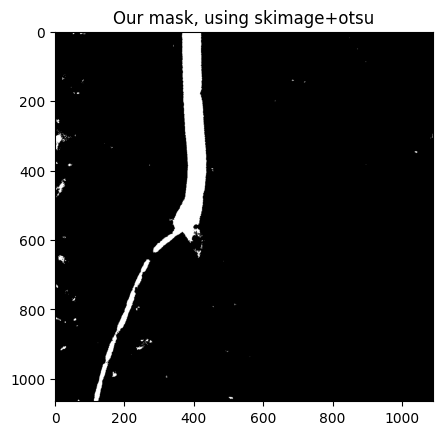

In [ ]:
#plt.imshow(filters.sobel(image_list[0]), cmap = "gray")
# perform automatic thresholding
t = skimage.filters.threshold_otsu(image_list[20])
print("Found automatic threshold t=", t, f' ({255*t})\n')

# create a binary mask with the threshold found by Otsu's method
binary_mask = image_list[20] > t

# display
plt.imshow(binary_mask, cmap='gray')
plt.title('Our mask, using skimage+otsu')

<ipython-input-5-61a1d61a8bd3>:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  left = filters.rank.median(left, neighborhood)
<ipython-input-5-61a1d61a8bd3>:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  right = filters.rank.median(right, neighborhood)


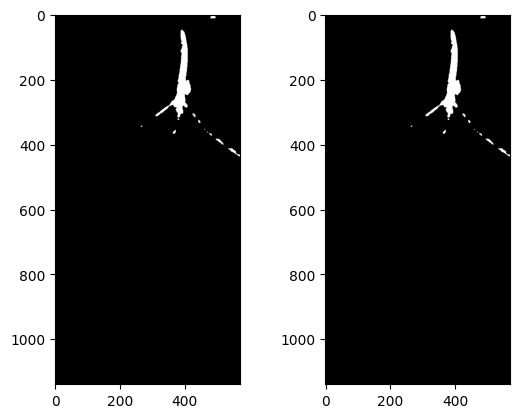

In [ ]:
neighborhood = disk(radius = 3)
left = filters.rank.median(left, neighborhood)
right = filters.rank.median(right, neighborhood)
plt.subplot(1,2,1)
plt.imshow(left, cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(right, cmap = "gray")

In [ ]:
for col_idx_right in range(np.shape(right)[1]-1, round(0.5*np.shape(right)[1]), -10):
    if np.any(right[:, col_idx_right] == 255):
        row_idx_right = np.where(right[:, col_idx_right] == 255)[0][0]
        print("right Found white pixel in column {} at row {}".format(col_idx_right, row_idx_right))
        break
else:
    print("No white pixels found in range of columns 1-50")

for col_idx_left in range(0, round(0.5*np.shape(left)[1])):
    if np.any(left[:, col_idx_left] == 255):
        row_idx_left = np.where(left[:, col_idx_left] == 255)[0][0]
        print("left Found white pixel in column {} at row {}".format(col_idx_left, row_idx_left))
        break
else:
    print("No white pixels found in range of columns 1-50")


right Found white pixel in column 569 at row 433
left Found white pixel in column 264 at row 345


In [ ]:
import math
#calculate
a_left = np.shape(left)[1]-col_idx_left
b_left = row_idx_left
angle_left = math.degrees(math.atan(b_left/a_left))

a_right = col_idx_right
b_right = row_idx_right
angle_right = math.degrees(math.atan(b_right/a_right))

angle = 180-angle_left-angle_right
angle

94.30107053950886

In [ ]:
def angle_finder_outsidein(img):
  ret, thresh = cv2.threshold(img, 0.65, 1, cv2.THRESH_BINARY)
  # left = thresh[700:900,500:585]  #cut image if nececcerry
  # right = thresh[700:900,585:700]
  # left = thresh
  left = thresh[460:,200:770]  #only cut for 1st test
  right = thresh[460:,200:770]
  #apply median filter to smooth white where it's not suppose to be
  neighborhood = disk(radius = 3)
  left = filters.rank.median(left, neighborhood)
  right = filters.rank.median(right, neighborhood)

  #start with finding location of right root:
  #iterate on the columne from right to left until you find a white pixle,
  #save the row and columne index for later use
  for col_idx_right in range(np.shape(right)[1]-1, round(0.5*np.shape(right)[1]), -10):
    if np.any(right[:, col_idx_right] == 255):
        row_idx_right = np.where(right[:, col_idx_right] == 255)[0][0]
        break
  else:
      print("No white pixels found in right")
  #now left side
  for col_idx_left in range(0, round(0.5*np.shape(left)[1])):
      if np.any(left[:, col_idx_left] == 255):
        row_idx_left = np.where(left[:, col_idx_left] == 255)[0][0]
        break
  else:
      print("No white pixels found in left")

  #calculate the length of two sides of the triangle,
  #use arctang() to find the angle.
  #left side
  a_left = np.shape(left)[1]-col_idx_left
  b_left = row_idx_left
  angle_left = math.degrees(math.atan(b_left/a_left))
  #right side
  a_right = col_idx_right
  b_right = row_idx_right
  angle_right = math.degrees(math.atan(b_right/a_right))
  #the angle we want is the one between the two roots
  #Calculate the angle according to the supplementary angles rule
  angle = 180-angle_left-angle_right
  return(angle)

In [ ]:
angle_finder_outsidein(img)

<ipython-input-48-14541a5c394e>:10: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  left = filters.rank.median(left, neighborhood)
<ipython-input-48-14541a5c394e>:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  right = filters.rank.median(right, neighborhood)


94.30107053950886

In [ ]:
#alternative if we want to start from the middle out:
def angle_finder_insidout(img):
  ret, thresh = cv2.threshold(img, 0.65, 1, cv2.THRESH_BINARY)
  left1 = thresh[700:900,500:585]
  right1 = thresh[700:900,585:700]
  #left = thresh[460:,200:770]
  #right = thresh[460:,200:770]
  #plt.imshow(left1, cmap = "gray")

  neighborhood = disk(radius = 3)
  left1 = filters.rank.median(left1, neighborhood)
  right1 = filters.rank.median(right1, neighborhood)

  for col_idx_right1 in range(round(0.5*np.shape(right1)[1]), np.shape(right1)[1]-1, 5):
    if np.any(right1[:, col_idx_right1] == 255):
        row_idx_right1 = np.where(right1[:, col_idx_right1] == 255)[0][0]
        #print("right pixle found in col {0} and row {1}".format(col_idx_right1, row_idx_right1))
        break
  else:
      print("No white pixels found in right")
  #now left side
  for col_idx_left1 in range(round(0.5*np.shape(left1)[1]), 0, -5):
      if np.any(left1[:, col_idx_left1] == 255):
        row_idx_left1 = np.where(left1[:, col_idx_left1] == 255)[0][0]
        #print("left pixle found in col {0} and row {1}".format(col_idx_left1, row_idx_left1))
        break
  else:
      print("No white pixels found in left")

  a_left1 = np.shape(left1)[1]-col_idx_left1
  b_left1 = row_idx_left1
  angle_left1 = math.degrees(math.atan(b_left1/a_left1))
  #right side
  a_right1 = col_idx_right1
  b_right1 = row_idx_right1
  angle_right1 = math.degrees(math.atan(b_right1/a_right1))
  #the angle we want is the one between the two roots
  #Calculate the angle according to the supplementary angles rule
  angle1 = 180-angle_left1-angle_right1
  return(angle1)

In [ ]:
angle_finder_insidout(img)

<ipython-input-44-12b530abea81>:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  left1 = filters.rank.median(left1, neighborhood)
<ipython-input-44-12b530abea81>:12: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  right1 = filters.rank.median(right1, neighborhood)


77.06587170708349

In [ ]:
folder_path = r'/content/drive/MyDrive/or_wheat/try'

# load file paths from chosen folder into a list
path_list = glob.glob(f'{folder_path}/*.*') #Rerurns a list of file names

In [ ]:
image_list=[]  # Empty list to store images from the folder.
for path in path_list:   #Iterate through each file in the list using for
    img = io.imread(path, as_gray = True)  # now, we can read each file since we have the full path
    img = img[855:1920, 1050:2140]
    image_list.append(img)  #Create a list of images (not just file names but full images)

<ipython-input-79-fc6cddb5e33e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,20))


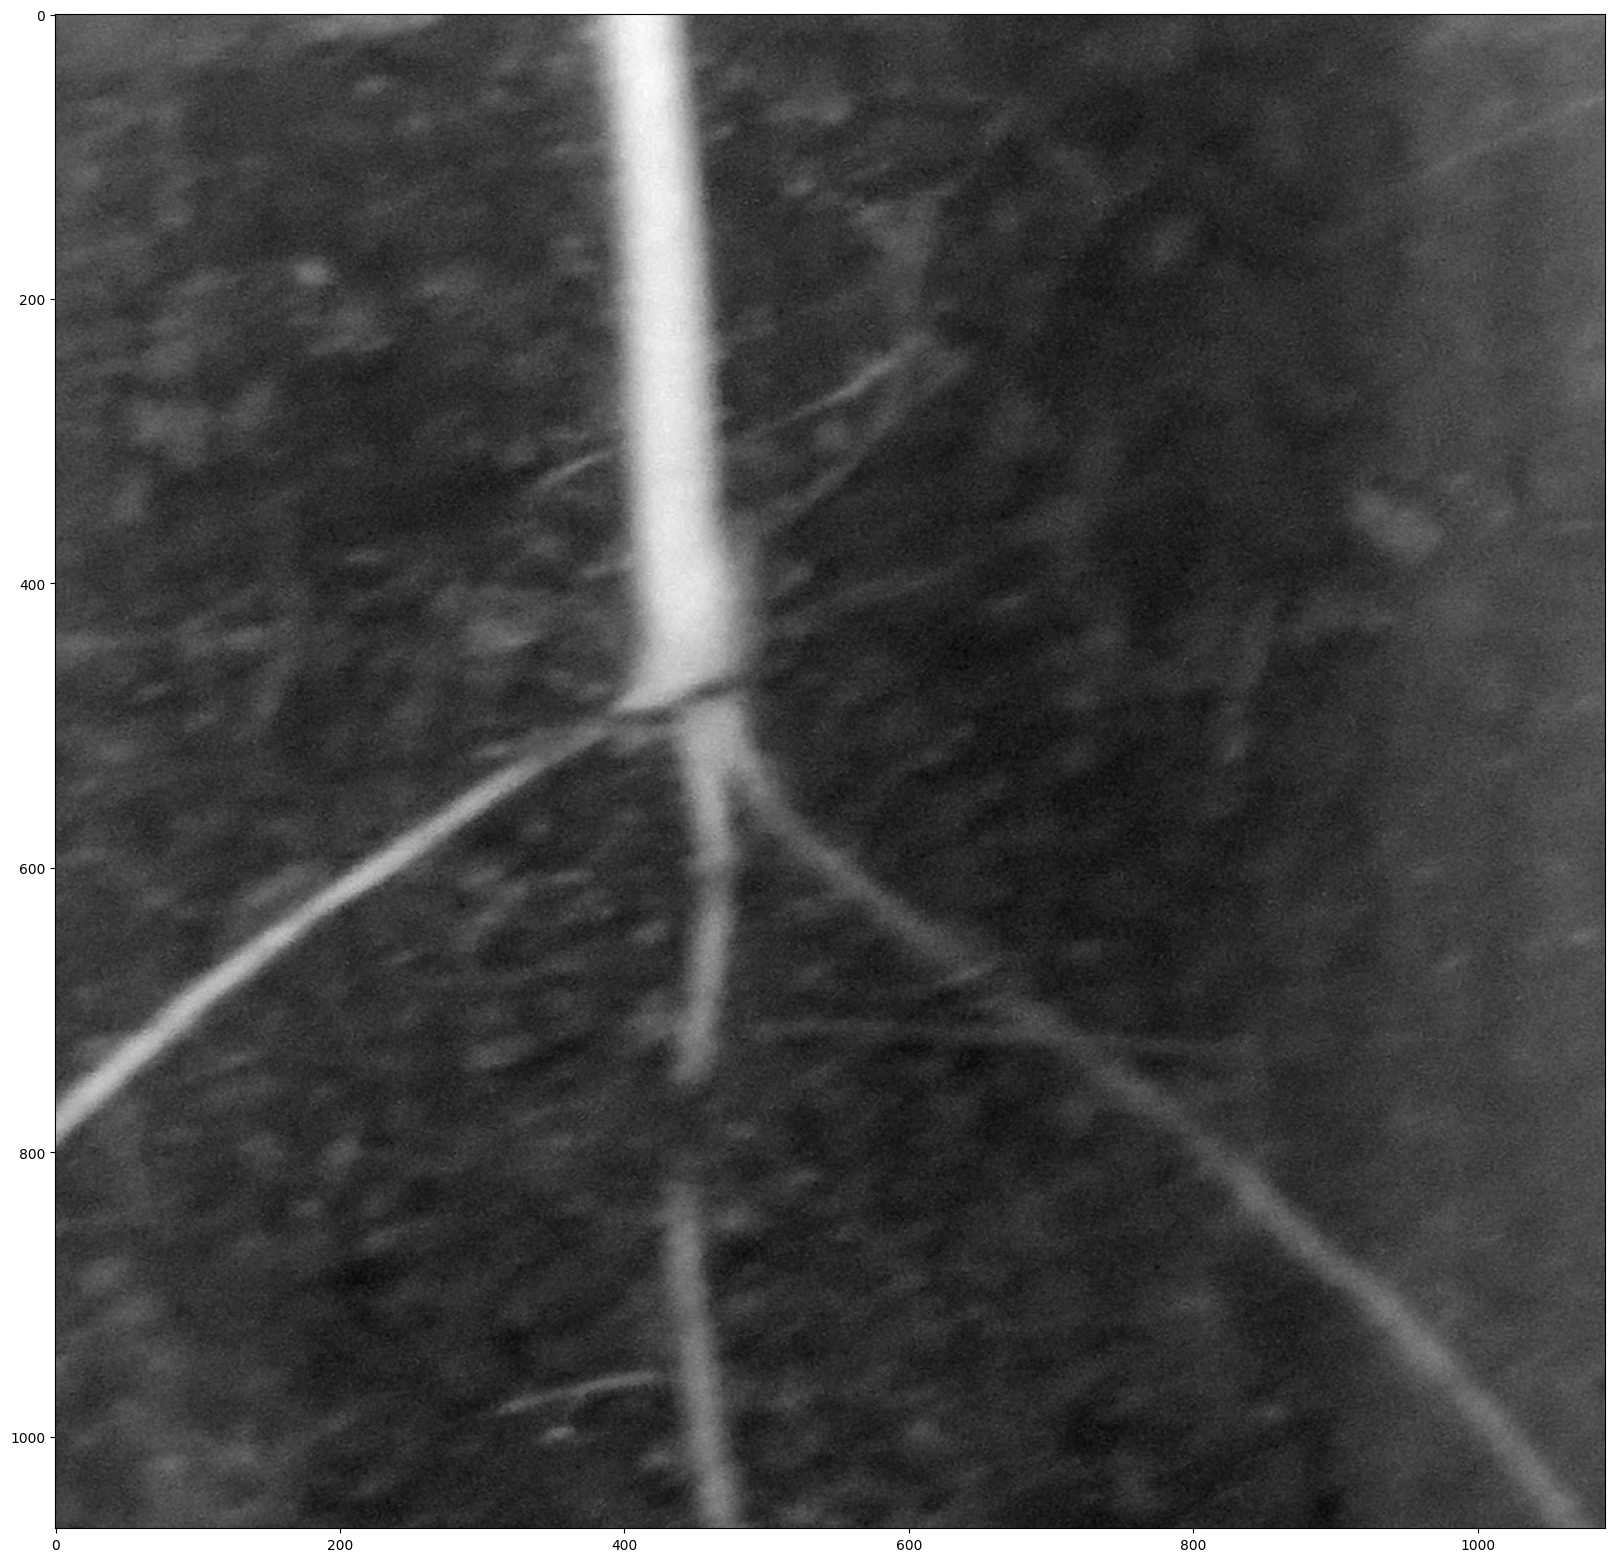

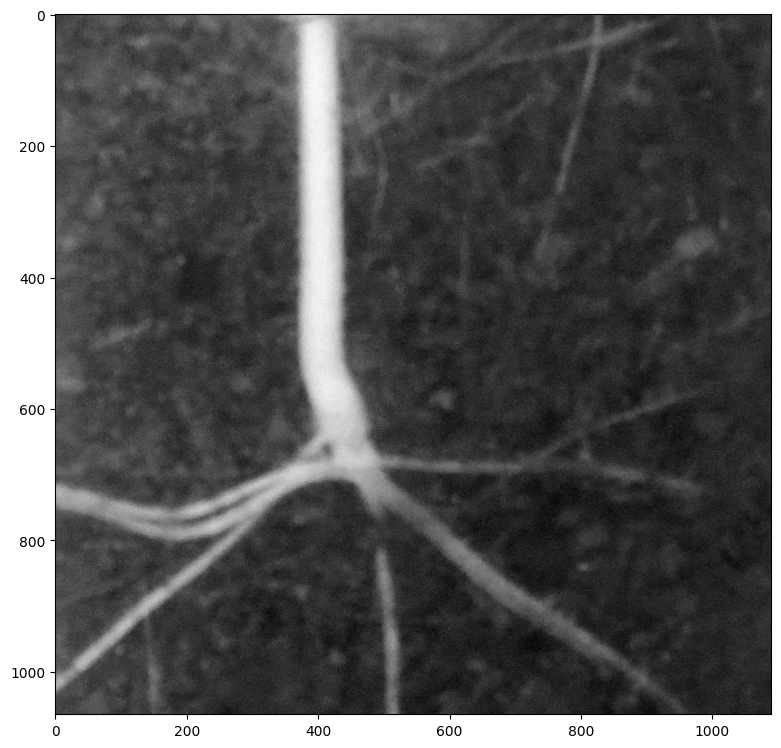

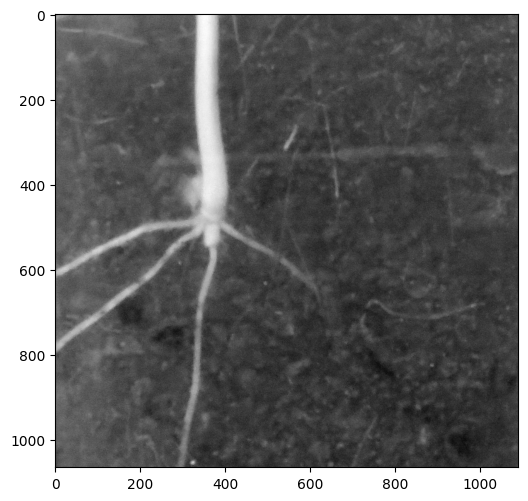

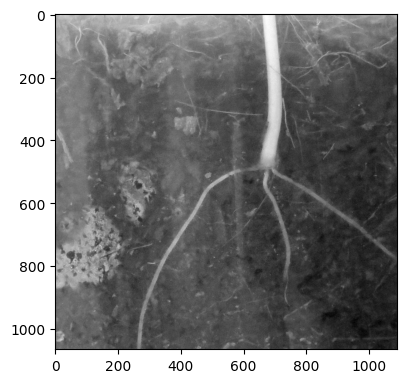

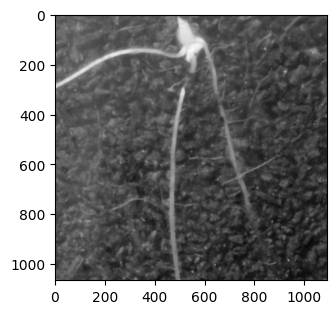

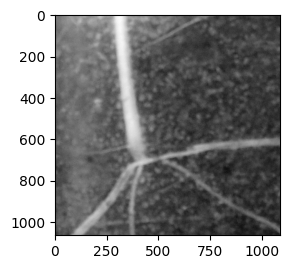

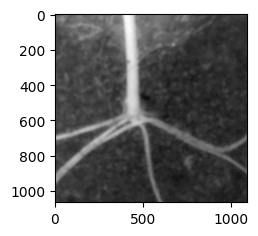

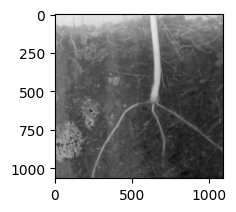

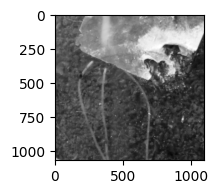

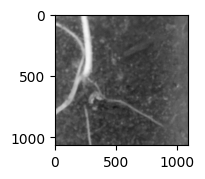

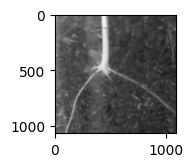

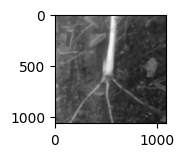

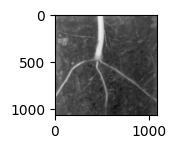

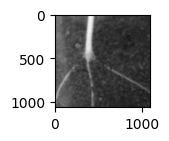

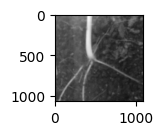

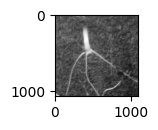

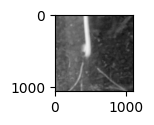

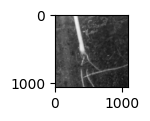

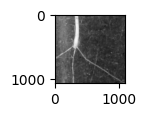

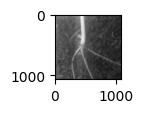

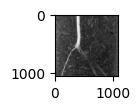

In [ ]:
for i, image in enumerate(image_list):
  plt.figure(figsize=(20,20))
  plt.subplot(i+1,1, i+1)
  plt.imshow(image, cmap = "gray")

In [ ]:
angle_finder_outsidein(image_list[0])

No white pixels found in right


<ipython-input-48-14541a5c394e>:10: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  left = filters.rank.median(left, neighborhood)
<ipython-input-48-14541a5c394e>:11: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  right = filters.rank.median(right, neighborhood)


UnboundLocalError: ignored

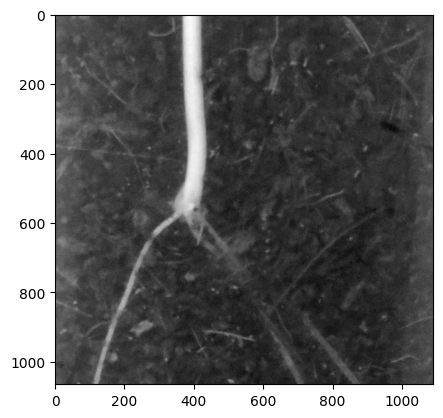

In [ ]:
plt.imshow(image_list[20][855:1920, 1050:2140], cmap = 'gray')